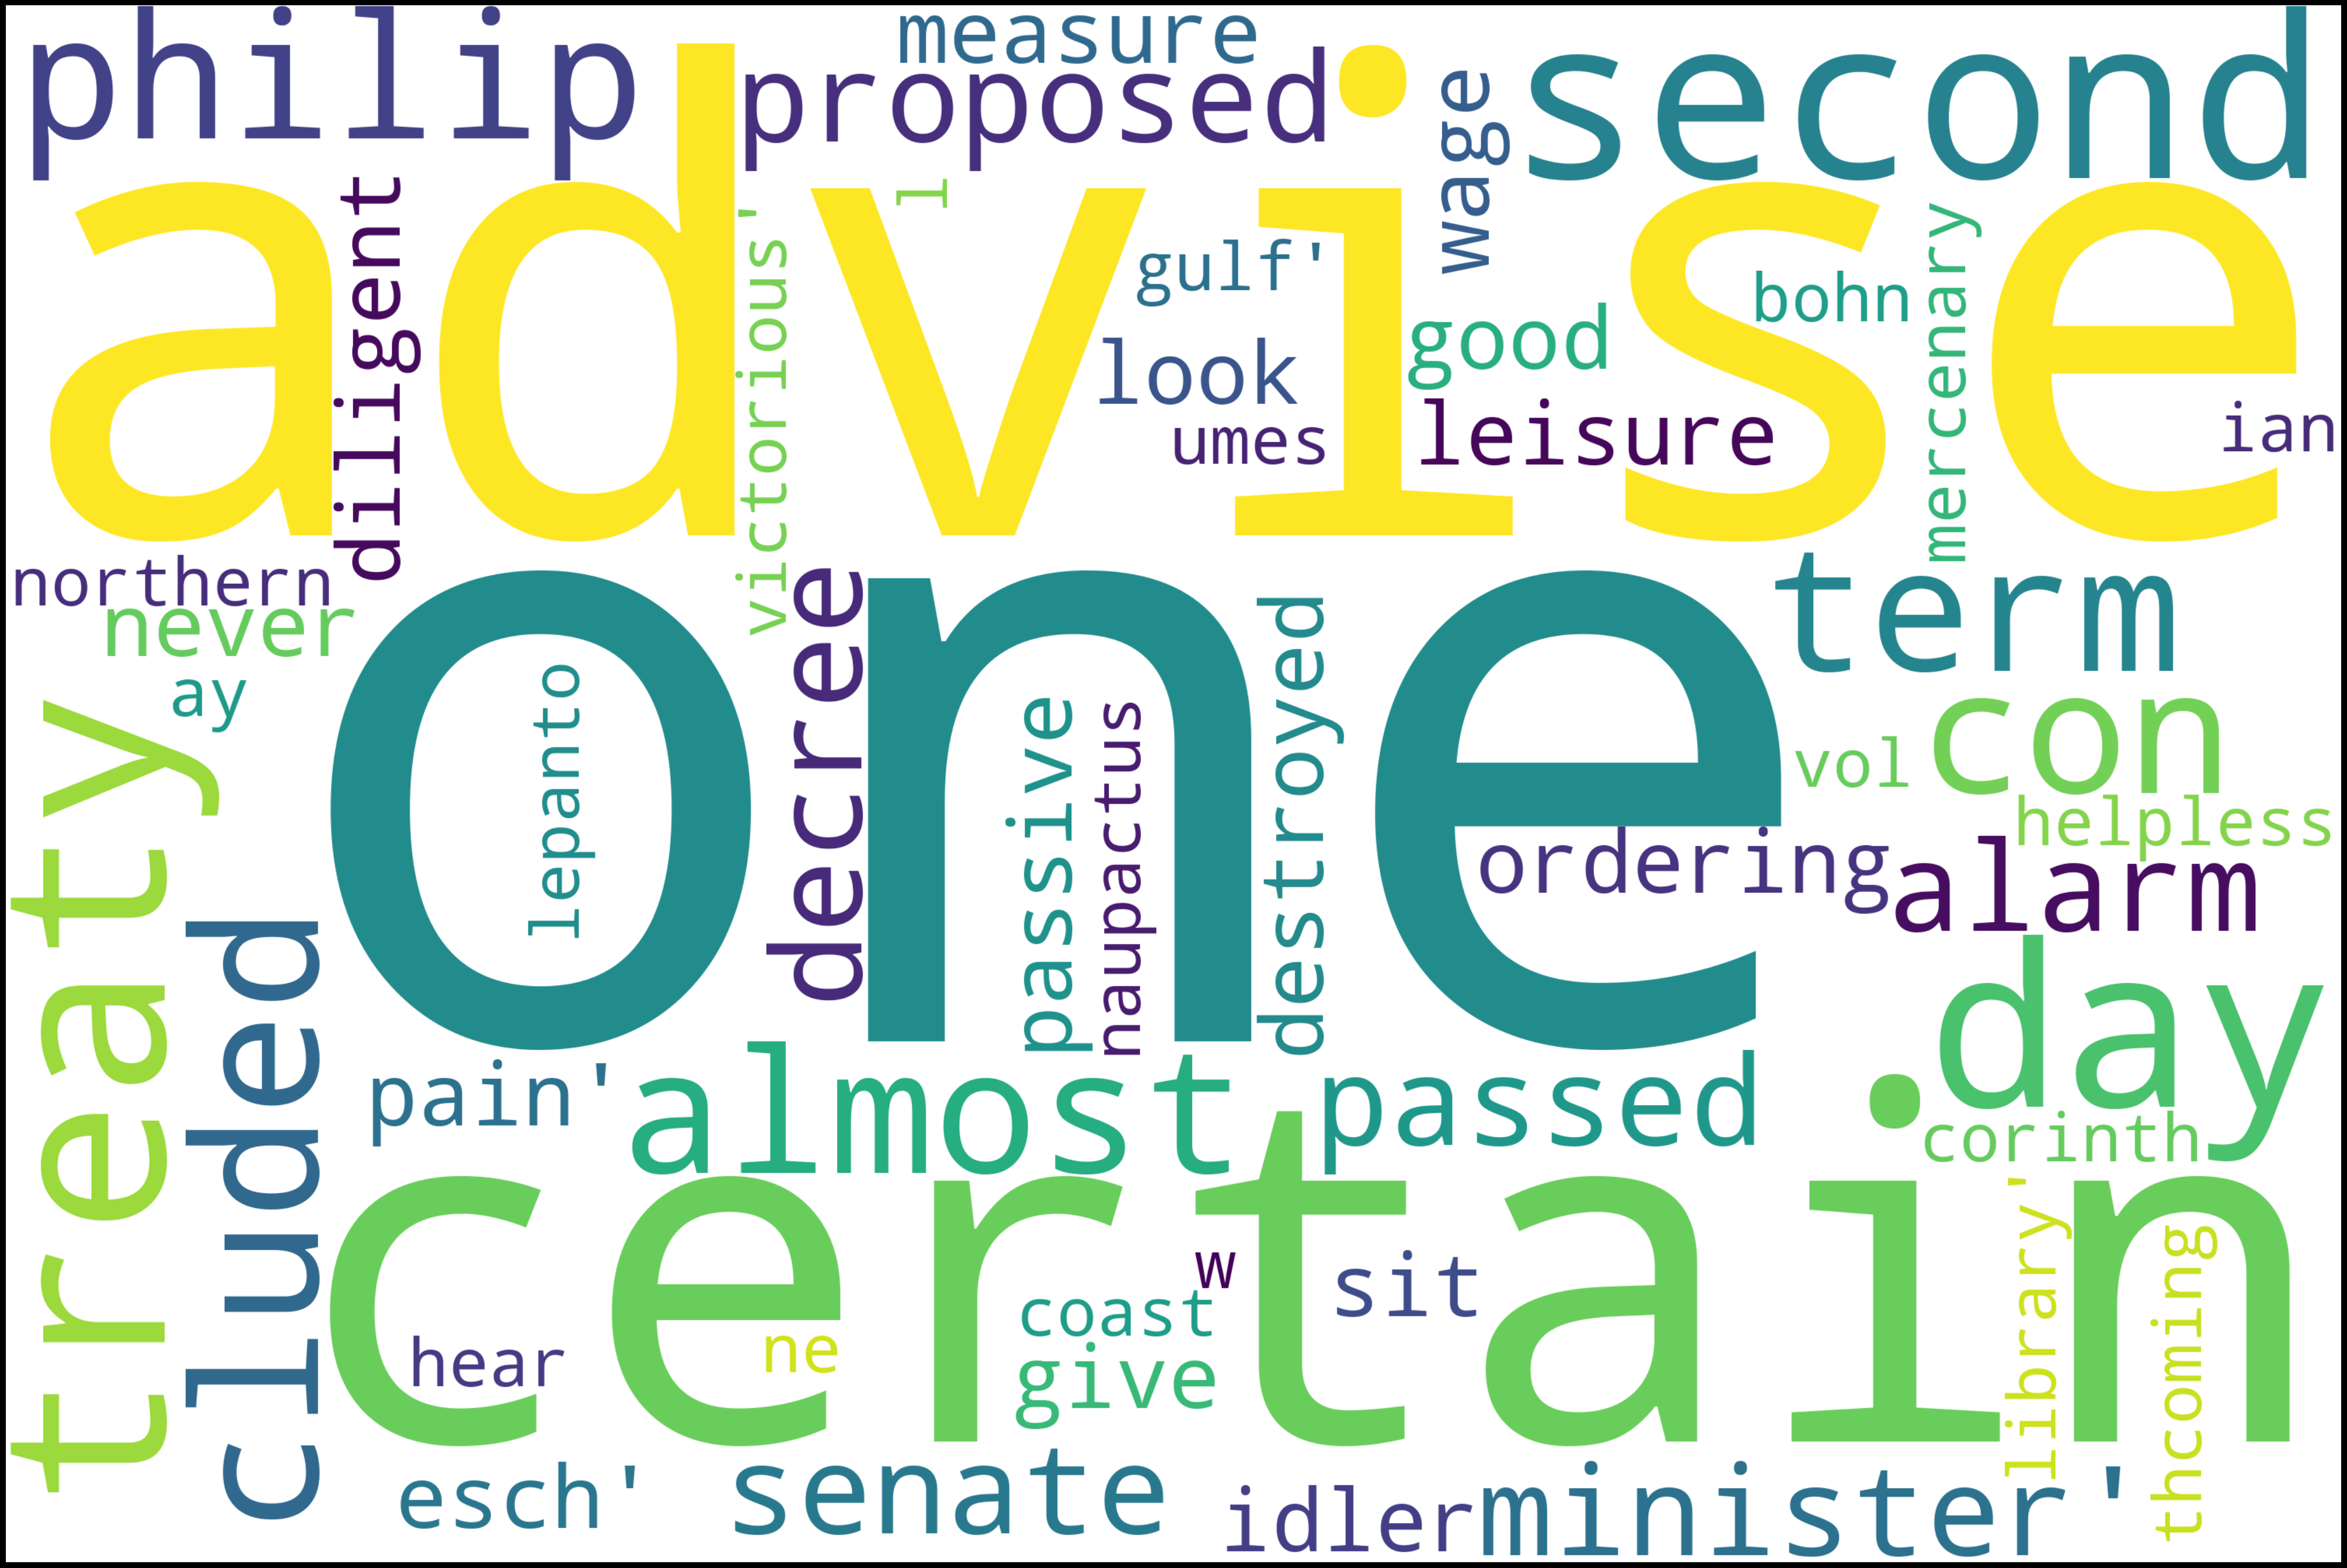

In [1]:
# load the train data as a pandas dataframe
import pandas as pd

train_data = pd.read_csv('train.csv')

#plot the text column as a wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = train_data.text.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [3]:
#run eda on the train data, a text corpus under the text column 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


In [30]:
#import TextBlob to calculate the sentiment of each word in the text
from textblob import TextBlob

#find the mean number of words per text in the train data, find the mean number of characters per word in the train text data, and find the mean sentiment of the train text data
def mean_words(text):
    words = text.split()
    return len(words)

def mean_chars(text):
    words = text.split()
    return sum(len(word) for word in words) / len(words)

def mean_sentiment(text):
    words = text.split()
    #calulate the sentiment of each word in the text
    sentiment = [TextBlob(word).sentiment.polarity for word in words]
    #calculate the mean sentiment of the text
    return sum(sentiment) / len(sentiment)




/var/folders/_8/5fm0bg890md4d79y3w9f4vvm0000gn/T/ipykernel_31368/2316434940.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['# Words'])


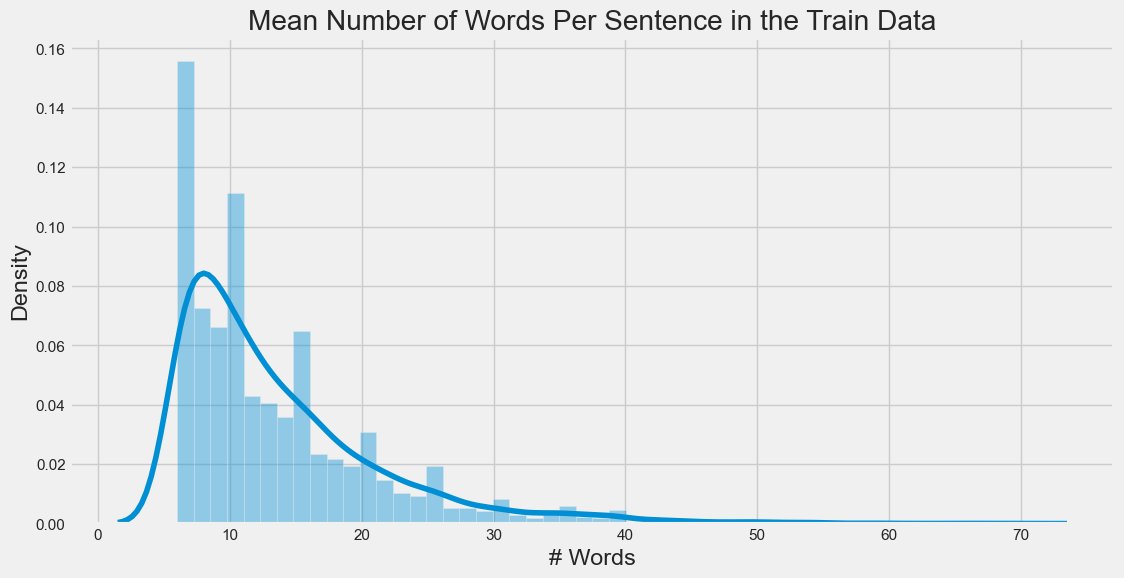

/var/folders/_8/5fm0bg890md4d79y3w9f4vvm0000gn/T/ipykernel_31368/2316434940.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['# Chars'])


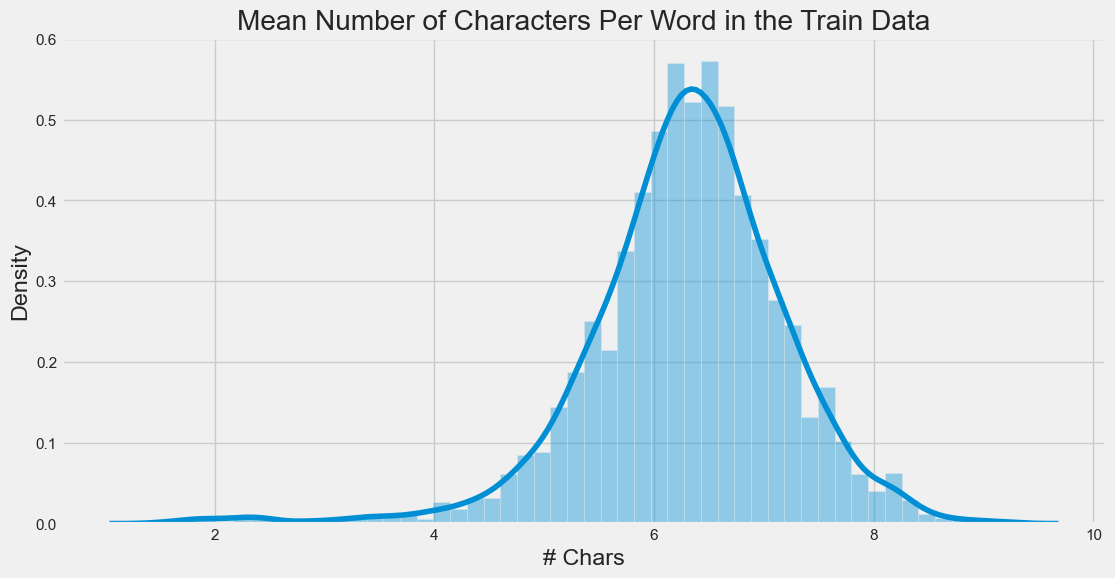

/var/folders/_8/5fm0bg890md4d79y3w9f4vvm0000gn/T/ipykernel_31368/2316434940.py:31: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Sentiment Score'])


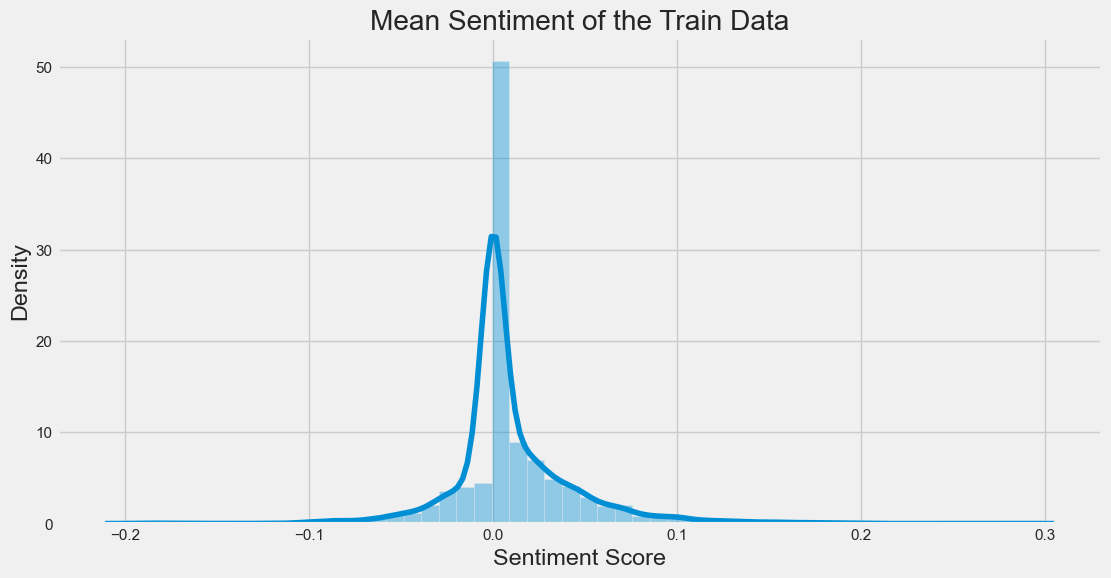

In [31]:
#call the last 3 functions on the entire train data for train[text] column
train_data['# Words'] = train_data['text'].apply(mean_words)

train_data['# Chars'] = train_data['text'].apply(mean_chars)

train_data['Sentiment Score'] = train_data['text'].apply(mean_sentiment)

#plot the mean number of words per text in the train data
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 6))
plt.title('Mean Number of Words Per Sentence in the Train Data')
plt.xlabel('Number of Words')
sns.distplot(train_data['# Words'])
plt.show()


plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 6))
plt.title('Mean Number of Characters Per Word in the Train Data')
plt.xlabel('Number of Characters')
sns.distplot(train_data['# Chars'])
plt.show()

plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 6))
plt.title('Mean Sentiment of the Train Data')
plt.xlabel('Sentiment Score')
sns.distplot(train_data['Sentiment Score'])
plt.show()


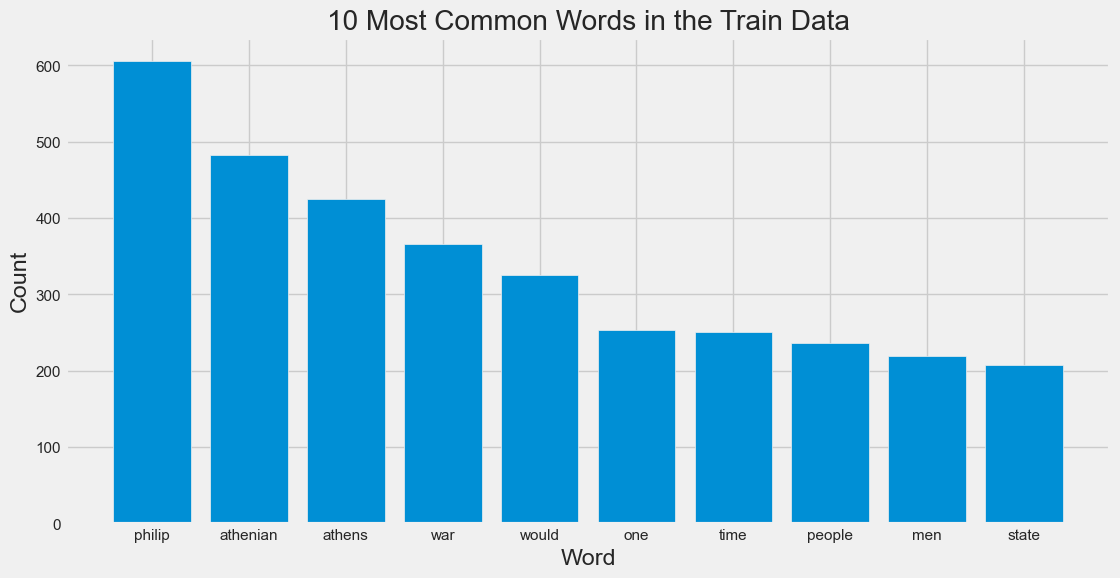

In [18]:
# plot the 10 most common words in the train data text column and their counts in fivethirtyeight theme
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))
plt.title('10 Most Common Words in the Train Data')
plt.xlabel('Word')
plt.ylabel('Count')

# Get the frequency distribution of words
word_freq = FreqDist(" ".join(train_data["text"]).split())
# Get the 10 most common words and their counts
common_words = word_freq.most_common(10)
# Extract the words and counts
words, counts = zip(*common_words)

# Plot the bar chart
plt.bar(words, counts)

plt.show()


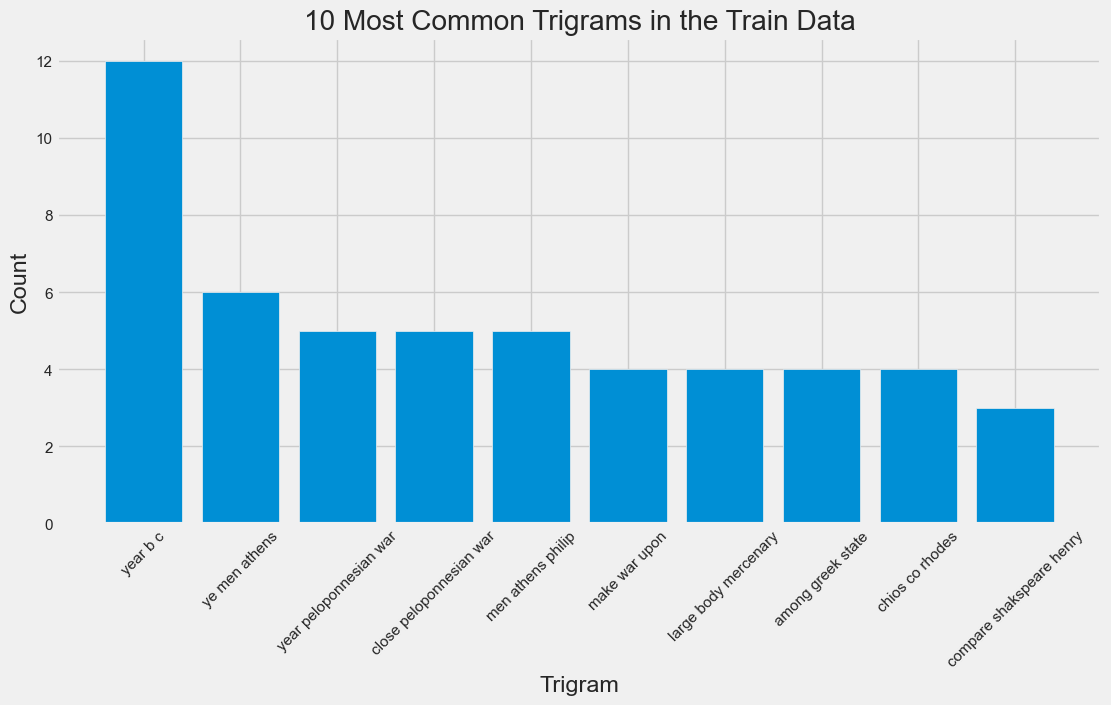

In [24]:
#plot the 10 most common trigrams in the train data text column and their counts in fivethirtyeight theme
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist
from nltk.util import ngrams

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 6))
plt.title('10 Most Common Trigrams in the Train Data')
plt.xlabel('Trigram')
plt.ylabel('Count')

# Get the frequency distribution of trigrams
trigram_freq = FreqDist(ngrams(" ".join(train_data["text"]).split(), 3))
# Get the 10 most common trigrams and their counts
common_trigrams = trigram_freq.most_common(10)
# Extract the trigrams and counts
trigrams, counts = zip(*common_trigrams)

# Convert trigrams to string representation
trigrams = [' '.join(trigram) for trigram in trigrams]

#plot the counts with the label as the trigram
plt.bar(trigrams, counts)
#rotate the xticks 45 degrees
plt.xticks(rotation=45)

plt.show()


In [28]:
#give me summary statistics on the train data
train_data.describe()


,text,subject,action,object
count,3876,3141,3876,3147
unique,3876,1442,1568,1425
top,however certain second day treaty philip con c...,philip,say,war
freq,1,103,78,68
